In [104]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import collections
import os
#import tensorflow as tf
from datetime import datetime
import numpy as np
import pandas as pd
import pickle as p
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import DBSCAN,KMeans
#from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import scipy as sp
import pickle
from scipy.stats import itemfreq
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Flatten
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
import pandas as pd
import pickle as p
import random
import keras
from keras import backend as K
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
stop_words = set(stopwords.words('italian'))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [105]:
data = pd.read_csv('dati/2021-01-14_daily_14.csv',sep=';',dtype={'cod_mart':str,'cod_mdep':str,'codAgente':str,'codPtoVend':str})


In [108]:
data['anno'] = data['data_reg'].str[:4]

In [109]:
data['anno'] = data['anno'].astype('int')

In [110]:
data.rename(columns={'GGmese':'ggmese'},inplace=True)

In [111]:
data=data[(data.qta_venduta>=0) &(data.anno<2021)]

In [112]:
df1 = data

In [113]:
df1 = df1[['cod_mart', 'cod_mdep', 'data_reg', 'mese', 'ggmese', 'settimana',
       'GGsettimana', 'ricorrenza',
       'peso', 'descr_mgrp', 'descr_msgr', 'descr_msfa', 'qta_cnf',
       'gg_scad_partita', 'promoNoPromo', 'sum_promo','QtaMediaVendGiorn',
       'PrezzoMedioVendGiorn', 'day1_ptoVend', 'day2_ptoVend', 'day3_ptoVend',
       'day4_ptoVend', 'day5_ptoVend', 'day6_ptoVend', 'day7_ptoVend',
       'prezzo_vendita', 'min_prezzo_vendita',
       'max_prezzo_vendita', 'variazione_prezzo',
       'min_variazione_prezzo', 'max_variazione_prezzo',
       'stdev_variazione_prezzo', 'dev_std_30', 'media_30', 'media_15',
       'media_7','qta_venduta', 'anno','inevaso','QuantitaSostituita','QuantitaResa']]#'media_30', 'media_15','media_7','qta_venduta','day1','day2','day3','day4','day5','day6','day7']]

In [114]:
data[(data.cod_mart=='138716') &( data.GGsettimana==2)][['data_reg','qta_venduta','QtaMediaVendGiorn']]

data_reg  qta_venduta  QtaMediaVendGiorn
277590  2017-01-03 00:00:00.000        169.0         169.000000
277595  2017-01-10 00:00:00.000        605.0         169.000000
277709  2017-01-17 00:00:00.000        173.0         387.000000
277877  2017-01-24 00:00:00.000        140.0         315.666667
277883  2017-01-31 00:00:00.000        220.0         271.750000
278024  2017-02-07 00:00:00.000        588.0         261.400000
278138  2017-02-14 00:00:00.000         97.0         345.200000
278144  2017-02-21 00:00:00.000        173.0         243.600000
278258  2017-02-28 00:00:00.000        109.0         243.600000
278263  2017-03-07 00:00:00.000        188.0         237.400000
278386  2017-03-14 00:00:00.000         96.0         231.000000
278491  2017-03-21 00:00:00.000        179.0         132.600000
278497  2017-03-28 00:00:00.000        203.0         149.000000
278584  2017-04-04 00:00:00.000        133.0         155.000000
278680  2017-04-11 00:00:00.000        162.0         159.800000
278685  2017-04-18 00:00:00.000        881.0         154.600000
278785  2017-05-02 00:00:00.000        751.0         311.600000
278944  2017-05-09 00:00:00.000        256.0         426.000000
279049  2017-05-16 00:00:00.000        211.0         436.600000
279055  2017-05-23 00:00:00.000        153.0         452.200000
279169  2017-05-30 00:00:00.000        372.0         450.400000
279274  2017-06-06 00:00:00.000        327.0         348.600000
279280  2017-06-13 00:00:00.000        292.0         263.800000
279403  2017-06-20 00:00:00.000        240.0         271.000000
279499  2017-06-27 00:00:00.000        339.0         276.800000
279505  2017-07-04 00:00:00.000        305.0         314.000000
279619  2017-07-11 00:00:00.000        240.0         300.600000
279760  2017-07-18 00:00:00.000        314.0         283.200000
279766  2017-07-25 00:00:00.000        450.0         287.600000
279889  2017-08-01 00:00:00.000        401.0         329.600000
279958  2017-08-08 00:00:00.000        537.0         342.000000
280113  2017-08-22 00:00:00.000        260.0         388.400000
280201  2017-08-29 00:00:00.000        265.0         392.400000
280207  2017-09-05 00:00:00.000        129.0         382.600000
280303  2017-09-12 00:00:00.000        211.0         318.400000
280462  2017-09-19 00:00:00.000        154.0         280.400000
280468  2017-09-26 00:00:00.000        217.0         203.800000
280546  2017-10-03 00:00:00.000        342.0         195.200000
280696  2017-10-10 00:00:00.000        304.0         210.600000
280702  2017-10-17 00:00:00.000        212.0         245.600000
280816  2017-10-24 00:00:00.000        152.0         245.800000
280894  2017-10-31 00:00:00.000        273.0         245.400000
280899  2017-11-07 00:00:00.000        146.0         256.600000
281031  2017-11-14 00:00:00.000         66.0         217.400000
281127  2017-11-21 00:00:00.000         97.0         169.800000
281133  2017-11-28 00:00:00.000        136.0         146.800000
281211  2017-12-05 00:00:00.000        144.0         143.600000
281216  2017-12-12 00:00:00.000        199.0         117.800000
281385  2017-12-19 00:00:00.000        201.0         128.400000
281512  2018-01-02 00:00:00.000        347.0         155.400000
281715  2018-01-09 00:00:00.000        197.0         205.400000
281721  2018-01-16 00:00:00.000         97.0         217.600000
281853  2018-01-23 00:00:00.000        234.0         208.200000
282003  2018-01-30 00:00:00.000         75.0         215.200000
282009  2018-02-06 00:00:00.000        126.0         190.000000
282150  2018-02-13 00:00:00.000        126.0         145.800000
282264  2018-02-20 00:00:00.000         61.0         131.600000
282270  2018-02-27 00:00:00.000        189.0         124.400000
282411  2018-03-06 00:00:00.000        106.0         115.400000
282624  2018-03-13 00:00:00.000        181.0         121.600000
282630  2018-03-20 00:00:00.000        163.0         132.600000
282762  2018-03-27 00:00:00.000        116.0         14

In [115]:
df1=df1[df1.descr_mgrp!='PARMALAT']
#df1=df1[~df1.cod_mart.isin(df1.cod_mart.value_counts()[500:].index)]

In [116]:
target=df1.groupby(['cod_mart','cod_mdep', 'descr_mgrp', 'descr_msgr', 'descr_msfa']).mean().drop(['anno','mese','ggmese','settimana','GGsettimana','sum_promo','ricorrenza','peso'],axis=1)
#target2=df1.groupby(['cod_mart','cod_mdep','codAgente', 'descr_mgrp', 'descr_msgr', 'descr_msfa','codCliente','codPtoVend']).max().drop(['mese','GGmese','settimana','GGsettimana', 'sum_promo','ricorrenza','peso'],axis=1)

In [117]:
target.fillna(0,inplace=True)

In [118]:
target.drop(['inevaso','QuantitaSostituita','QuantitaResa'],axis=1,inplace=True)

In [119]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20, max_iter=300)
kmeans.fit(target)
labels=kmeans.predict(target)
target['cluster']=labels

In [120]:
df1 = df1.merge(target['cluster'],on=['cod_mart','cod_mdep', 'descr_mgrp', 'descr_msgr', 'descr_msfa'],how='left')

In [121]:
target['cluster'].reset_index(level=0).to_csv('clusters_14_daily')

In [122]:
def creaVariabile_qtaVend_SETTprec(df):
    grouped_df2 = df.groupby(['cod_mart','cod_mdep','settimana'],as_index=False)['qta_venduta'].sum()    
    grouped_df2['qta_venduta_settPrec'] = grouped_df2\
                                .sort_values(['cod_mart','cod_mdep','settimana'])\
                                .qta_venduta.shift(1)
    df1 = pd.merge(df, grouped_df2[['cod_mart','cod_mdep','settimana','qta_venduta_settPrec']],
               how='left',
               on=['cod_mart','cod_mdep','settimana'])
    
    
    return df1

In [123]:
def convert_time(end_date):
    
    # Remove on period and after
    end_date = end_date.split(" ")
    end_date[-1] = end_date[-1][:12]
    end_date = " ".join(end_date)

    return end_date

In [124]:
df1=creaVariabile_qtaVend_SETTprec(df1)
df1['qta_venduta_settPrec'].fillna(0,inplace=True)

In [125]:
df_meteo=pd.read_csv('dati/meteo_bari',index_col=0)

In [126]:
df_meteo['data_reg']=df_meteo['data_reg'].apply(convert_time)
df_l=df1[~(df1.data_reg.isin(df_meteo.data_reg.unique()))]

In [127]:
import time as tm
from forecastiopy import *
apikey = '679f07cc6e387621a41b11bf17989d90'
citta='BARI'
dep_cit = np.load('dati/dep_cit.npy',allow_pickle=True).item()
date_list=df_l['data_reg'].unique()
for i in date_list:
    
        i= datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%dT%H:%M:%S')
        print(i)
        dep_cit[citta]['date'][i]={"meteo":dict()}
        tm.sleep(1)
        fio = ForecastIO.ForecastIO(apikey,
                                        units=ForecastIO.ForecastIO.UNITS_SI,
                                        lang=ForecastIO.ForecastIO.LANG_ITALIAN,
                                        latitude=dep_cit[citta]['coordinate'][0], 
                                        longitude=dep_cit[citta]['coordinate'][1],
                                        time=i
                                   )
        dep_cit[citta]['date'][i]['meteo']=fio.daily['data'][0]
        df_comp=pd.DataFrame.from_dict(dep_cit[citta]['date'][str(i)],orient="index")
        df_comp['data_reg']=datetime.strptime(i,'%Y-%m-%dT%H:%M:%S').strftime('%Y-%m-%d %H:%M:%S.%f')
        df_comp['citta']=citta
        df_meteo=df_meteo.append(df_comp)
        df_meteo=df_meteo.drop_duplicates()
        df_meteo=df_meteo.reset_index(drop=True)
        
        df_meteo.to_csv('dati/meteo_bari')   
       


In [128]:
df_meteoN = df_meteo.copy()
df_meteoN = df_meteoN[df_meteoN.citta=='BARI']
df_meteoN['index'] = df_meteoN.index
df_meteoN = df_meteoN.loc[df_meteoN.groupby("data_reg")["index"].idxmax()]
df1 = pd.merge(df1, df_meteoN[df_meteoN.citta=='BARI'][['data_reg','apparentTemperatureMax','apparentTemperatureMin','cloudCover','humidity','precipIntensity','precipIntensityMax','precipProbability','windBearing','windSpeed','icon']],
               how='left',
               on=['data_reg'])

In [129]:
df1['apparentTemperatureMax'].fillna(0,inplace=True)
df1['apparentTemperatureMin'].fillna(0,inplace=True)
df1['cloudCover'].fillna(0,inplace=True)
df1['humidity'].fillna(0,inplace=True)
df1['precipIntensity'].fillna(0,inplace=True)
df1['precipIntensityMax'].fillna(0,inplace=True)
df1['precipProbability'].fillna(0,inplace=True)
df1['windBearing'].fillna(0,inplace=True)
df1['windSpeed'].fillna(0,inplace=True)

In [130]:
#introduzione stop_words
stop_words.add('lt')
stop_words.add('pz')
stop_words.add('pezzi')
stop_words.add('pezz')
stop_words.add('fresco')
stop_words.add('freschi')
stop_words.add('chef')
stop_words.add('int')
stop_words.add('gr')
stop_words.add('kg')
stop_words.add('cucina')
stop_words.add('flash')
stop_words.add('intero')
stop_words.add('scremato')
stop_words.add('parz')
stop_words.add('ca')
stop_words.add('uh')
stop_words.add('uht')
stop_words.add('%')
stop_words.add('g')
stop_words.add('fr')
stop_words.add('fresca')
stop_words.add('fresche')
stop_words.add('mix')
stop_words.add('bio')
stop_words.add('gran')
stop_words.add('picc')
stop_words.add('sv')
stop_words.add('grande')
stop_words.add('piccolo')
stop_words.add('rosso')
stop_words.add('nero')
stop_words.add('giallo')
stop_words.add('verde')
stop_words.add('arancione')
stop_words.add('blu')
stop_words.add('più')
stop_words.add('piu')
stop_words.add('pf')
stop_words.add('l')
stop_words.add('ml')
stop_words.add('mg')

#ripulisco gruppo sottogruppo e sottofamiglia
a= df1[['cod_mart','descr_mgrp','descr_msgr','descr_msfa']].drop_duplicates()
a.descr_mgrp.fillna('',inplace=True)
a.descr_msgr.fillna('',inplace=True)
a.descr_msfa.fillna('',inplace=True)
new_df=pd.DataFrame(data=a)

for i in range(len(a)):
    row=a.iloc[i]
    word_tokenize= RegexpTokenizer(r'\w+')
    mgrp = word_tokenize.tokenize(row[1])
    msgr = word_tokenize.tokenize(row[2])
    msfa = word_tokenize.tokenize(row[3])
    msgr1  = [word for word in msgr if word not in mgrp and not re.search("\d", word) and not word.lower()  in stop_words]
    msfa1 = [word for word in msfa if word not in mgrp  and not re.search("\d", word) and not word.lower()  in stop_words]
    msfa2 = [word for word in msfa1 if word not in msgr and not re.search("\d", word) and not word.lower()  in stop_words]
    if len(msgr1)==0:
        msgr1=msgr
    if len(msfa1)==0:
        msfa1=msfa
    if len(msfa2)==0:
        msfa2=msfa1
    new_df.loc[new_df['cod_mart']==row.cod_mart,'descr_msgr']= ' '.join(msgr1)
    new_df.loc[new_df['cod_mart']==row.cod_mart,'descr_msfa']= ' '.join(msfa2)
    

#Applico TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
corpus =new_df.descr_msfa
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

def min_sparse(X):
    if len(X.data) == 0:
        return 0
    m = X.data.min()
    return m if X.getnnz() == X.size else min(m, 0)

from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

'''ps = SnowballStemmer('italian')
descr_msfa=[]
for i in range(len(corpus)):
    trovato=False
    for j in X[i].indices:
        if X[i,j]==min_sparse(X[i]):
            descr_msfa.append(ps.stem(vectorizer.get_feature_names()[j]))
            trovato=True
            break
    if trovato==False:
        descr_msfa.append(new_df.iloc[i].descr_msgr)
new_df['descr_msfa']=descr_msfa
'''
df1.rename(columns={'descr_mgrp':'d1','descr_msgr':'d2','descr_msfa':'d3'}, inplace=True)
df1=df1.merge(new_df, how='left', on ='cod_mart')

In [132]:
import gensim
from sklearn.decomposition import PCA
model=  gensim.models.KeyedVectors.load_word2vec_format("../Carelli/model.bin",binary=True)
def avg_sentence(sentences, wv):
    first=True
    for sentence in sentences:
        v = np.zeros(100)
        for w in sentence.split():
            if w.lower() in wv:
                v += wv[w.lower()]
        if first:
            df=pd.DataFrame((v / len(sentence.split()))).T
            first=False
        else: 
            df1=pd.DataFrame((v / len(sentence.split()))).T
            df=df.append(df1)
    return df
df2=df1[['cod_mart','descr_mgrp','descr_msgr','descr_msfa']].drop_duplicates()
df =avg_sentence(df2['descr_mgrp'].astype(str) + " "+ df2['descr_msgr'].astype(str)+" " + df2['descr_msfa'].astype(str),model).reset_index(drop=True)

pca = PCA(10)
pca.fit(df.fillna(0.0))
df=pd.DataFrame(pca.transform(df.fillna(0)))
df2=pd.concat([df,df2['cod_mart'].reset_index(drop=True)],axis=1)
df1=df1.merge(df2, how='left', on ='cod_mart')

In [133]:
cardinality=df1['cod_mart'].unique()
sales_mapping_art = dict(zip(cardinality, range(0, len(cardinality))))
df1['cod_mart'] = df1['cod_mart'].map(sales_mapping_art).astype(int)

cardinality=df1['cod_mdep'].unique()
sales_mapping_dep = dict(zip(cardinality, range(0, len(cardinality))))
df1['cod_mdep'] = df1['cod_mdep'].map(sales_mapping_dep).astype(int)

df1['peso'].fillna(1.0,inplace=True)

cardinality=df1['descr_mgrp'].unique()
sales_mapping_descr_mgrp = dict(zip(cardinality, range(0, len(cardinality))))


cardinality=df1['descr_msgr'].unique()
sales_mapping_descr_msgr = dict(zip(cardinality, range(0, len(cardinality))))

cardinality=df1['descr_msfa'].unique()
sales_mapping_descr_msfa = dict(zip(cardinality, range(0, len(cardinality))))


unique_dict={}
elements=df1[['d1','d2','d3','descr_mgrp','descr_msgr','descr_msfa',\
0,1,2,3,4,5,6,7,8,9]].drop_duplicates()
for element in range(len(elements)):
    row=elements.iloc[element]
    val=str(elements['d1'].values[element])+" "+str(elements['d2'].values[element])+" "+str(elements['d3'].values[element])
    if val not in unique_dict:
        unique_dict[val]={'descr_mgrp':'','descr_msgr':'','descr_msfa':'','0':0 ,'1':0 ,'2':0 ,'3':0 ,'4':0 ,'5':0 ,'6':0 ,'7':0 ,'8':0 ,'9':0 ,}
        unique_dict[val]['descr_mgrp']=sales_mapping_descr_mgrp[row.descr_mgrp]
        unique_dict[val]['descr_msgr']=sales_mapping_descr_msgr[row.descr_msgr]
        unique_dict[val]['descr_msfa']=sales_mapping_descr_msfa[row.descr_msfa]
        unique_dict[val]['0']=row[0]
        unique_dict[val]['1']=row[1]
        unique_dict[val]['2']=row[2]
        unique_dict[val]['3']=row[3]
        unique_dict[val]['4']=row[4]
        unique_dict[val]['5']=row[5]
        unique_dict[val]['6']=row[6]
        unique_dict[val]['7']=row[7]
        unique_dict[val]['8']=row[8]
        unique_dict[val]['9']=row[9]

        
df1.drop(['d1','d2','d3'],axis=1, inplace=True)
df1['descr_mgrp'] = df1['descr_mgrp'].map(sales_mapping_descr_mgrp).astype(int)
df1['descr_msgr'] = df1['descr_msgr'].map(sales_mapping_descr_msgr).astype(int)
df1['descr_msfa'] = df1['descr_msfa'].map(sales_mapping_descr_msfa).astype(int)

In [134]:
np.save('dictionaries/dep.npy', sales_mapping_dep)
np.save('dictionaries/unique_dict.npy', unique_dict)

In [135]:
df1['anno'] = df1['anno'].astype('int')

In [136]:
df_train = df1.loc[(df1['anno']!=2020) |((df1['anno']==2020) & ((df1.settimana<7) | (df1.settimana>21)))] 
df_val = df1.loc[df1['anno'] ==2020] 
df_test=df1.loc[df1['anno'] ==2020]

In [137]:
df_val.drop('anno',axis=1, inplace=True)
df_train.drop('anno',axis=1 , inplace=True)
df_test.drop('anno',axis=1 , inplace=True)

In [138]:
df_train=df_train[df_train.qta_venduta>=0]
df_val=df_val[df_val.qta_venduta>=0]

In [139]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [140]:
X, y =df_train.drop(['cod_mart','qta_venduta','data_reg'],axis=1),df_train['qta_venduta']
#X_train, X_test,X_val, y_train, y_test,y_val=X,df_test.drop(['qta_venduta'],axis=1),df_val.drop(['cod_mart','qta_venduta'],
 #                                                                                                axis=1),y,df_test['qta_venduta'],df_val['qta_venduta']
X_train,X_val,X_test, y_train,y_val,y_test=X,df_val.drop(['cod_mart','qta_venduta','data_reg'],axis=1),\
                                            df_test.drop(['cod_mart','qta_venduta','data_reg'],axis=1),\
                                            y,df_val['qta_venduta'],df_test['qta_venduta']


In [141]:
X_val.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_train.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_test.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_test['cluster'].fillna(25,inplace=True)
X_train['cluster'].fillna(25,inplace=True)
X_val['cluster'].fillna(25,inplace=True)

In [142]:
X_train.drop('icon', axis=1, inplace=True)
X_val.drop('icon', axis=1, inplace=True)

In [143]:
X_train.columns

Index([               'cod_mdep',                    'mese',
                        'ggmese',               'settimana',
                   'GGsettimana',              'ricorrenza',
                          'peso',                 'qta_cnf',
               'gg_scad_partita',            'promoNoPromo',
                     'sum_promo',       'QtaMediaVendGiorn',
          'PrezzoMedioVendGiorn',            'day1_ptoVend',
                  'day2_ptoVend',            'day3_ptoVend',
                  'day4_ptoVend',            'day5_ptoVend',
                  'day6_ptoVend',            'day7_ptoVend',
                'prezzo_vendita',      'min_prezzo_vendita',
            'max_prezzo_vendita',       'variazione_prezzo',
         'min_variazione_prezzo',   'max_variazione_prezzo',
       'stdev_variazione_prezzo',              'dev_std_30',
                      'media_30',                'media_15',
                       'media_7',                 'cluster',
          'qta_venduta_s

In [144]:
X_train.head()

cod_mdep  mese  ggmese  settimana  GGsettimana  ricorrenza  peso  qta_cnf  \
0         0     2      24          9            5           0  0.25      8.0   
1         0    11       4         45            6           0  1.60      1.0   
2         0     7      15         29            3           0  0.25      5.0   
3         0     1      23          4            3           0  0.50      6.0   
4         0     8      12         33            6           0  0.50     10.0   

   gg_scad_partita  promoNoPromo  sum_promo  QtaMediaVendGiorn  \
0             48.0          11.0         11                6.2   
1            120.0           0.0          0                1.0   
2             33.0           0.0         13               10.0   
3             33.0           0.0          0                6.6   
4             60.0           0.0          0               58.6   

   PrezzoMedioVendGiorn  day1_ptoVend  day2_ptoVend  day3_ptoVend  \
0              0.669199           3.0           4.0           8.0   
1              2.791429           3.0           2.0           0.0   
2              0.671229          12.0           4.0           0.0   
3              0.565743           3.0          18.0           3.0   
4              0.417070         200.0         317.0         140.0   

   day4_ptoVend  day5_ptoVend  day6_ptoVend  day7_ptoVend  prezzo_vendita  \
0           0.0           0.0          15.0           7.0        1.659000   
1           1.0           2.0           2.0           5.0        6.570000   
2          15.0          12.0           8.0          24.0        0.844000   
3          14.0           7.0           5.0           3.0        0.635556   
4         483.0         109.0          75.0         288.0        0.786624   

   min_prezzo_vendita  max_prezzo_vendita  variazione_prezzo  \
0             0.00000               1.659                0.0   
1             0.00000               6.570                0.0   
2             0.41356               0.844                0.0   
3             0.00000               0.730                0.0   
4             0.00000               0.900                0.0   

   min_variazione_prezzo  max_variazione_prezzo  stdev_variazione_prezzo  \
0                    0.0               0.000000                    0.000   
1                    0.0               0.000000                    0.000   
2                    0.0               0.041667                    0.125   
3                    0.0               0.000000                    0.000   
4                    0.0               0.000000                    0.000   

   dev_std_30    media_30    media_15     media_7  cluster  \
0    5.122040    6.666667    6.111111    5.000000      2.0   
1   10.884420    5.000000    2.444444    1.666667      2.0   
2   10.028228   11.277778    9.666667    8.500000      2.0   
3    5.910000    6.888889    7.000000    8.333333      2.0   
4  114.752547  173.500000  221.555556  220.666667      2.0   

   qta_venduta_settPrec  apparentTemperatureMax  apparentTemperatureMin  \
0                  53.0                   19.04                    7.74   
1                  73.0                   18.12                    9.21   
2                 302.0                   28.69                   19.67   
3                 202.0                   10.68                   -0.82   
4                3640.0                   31.08                   18.96   

   cloudCover  humidity  precipIntensity  precipIntensityMax  \
0        0.47      0.74           0.0000              0.0000   
1        0.32      0.76           0.0000              0.0000   
2        0.29      0.60           0.0487              0.5633   
3        0.19      0.74           0.0000              0.0000   
4        0.26      0.48           0.1397              2.9007   

   precipProbability  windBearing  windSpeed  descr_mgrp  descr_msgr  \
0               0.00          176       3.16          19          32   
1               0.00          336       1.20        

In [145]:
df_train.qta_venduta.value_counts()

0.000       120737
2.000        22993
1.000        21793
3.000        16071
6.000        15243
             ...  
10.918           1
2.708            1
1564.000         1
15.786           1
1.159            1
Name: qta_venduta, Length: 6394, dtype: int64

# XGBoost

In [146]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',min_child_weight=5, colsample_bytree =0.9,learning_rate = 0.05,tree_method='hist',
                 n_estimators = 1000, max_depth=15,n_jobs=128,tweedie_variance_power=1.1)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_val)
mab = mean_absolute_error(y_val, preds)
print(mab)
sum(preds)-sum(y_val)

[17:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { tweedie_variance_power } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


10.473507134840325


-29008.050683174282

In [147]:
xg_reg.save_model('model.json')

In [41]:
xg_reg= xgb.Booster({'nthread': 4})
xg_reg.load_model('model2.json')

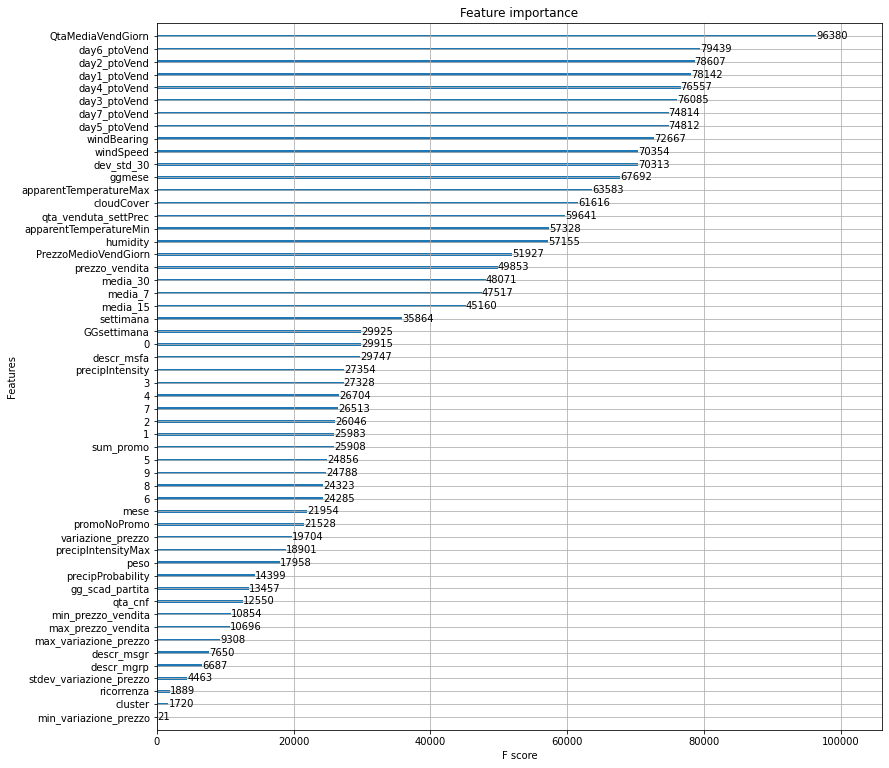

In [149]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [13, 13]
plt.show()

# Data Analysis

In [47]:
df_val['qta_predetta']=np.around(preds)
df_val['agent_sales']=df_val['qta_venduta']-df_val['inevaso']+df_val['QuantitaResa']+df_val['QuantitaSostituita']
df_val['valore_predetto']=df_val['qta_predetta']*df_val.prezzo_vendita
df_val['valore_ottimo']=df_val['qta_venduta']*df_val.prezzo_vendita
df_val['valore_agente']=df_val['agent_sales']*df_val.prezzo_vendita

In [48]:
df=df_val[['cod_mart','mese','ggmese','settimana','qta_venduta','qta_predetta','agent_sales']]

In [49]:
df=df.groupby(['cod_mart','mese','settimana']).sum().reset_index()

In [50]:
df[(df.cod_mart==sales_mapping_art['802076']) & (df.mese<9) & ((df.mese<=2) | (df.mese>=6))]

cod_mart  mese  settimana  ggmese  qta_venduta  qta_predetta  \
15375       537     1          2       8       4140.0        2828.0   
15376       537     1          5      29        690.0         310.0   

       agent_sales  
15375       4140.0  
15376        690.0

In [51]:
def plotta_art(cod_mart):
    plt.plot(df[(df.cod_mart==cod_mart)].reset_index().qta_venduta, 'b') # plotting t, b separately 
    plt.plot( df[(df.cod_mart==cod_mart)].reset_index().qta_predetta, 'g') # plotting t, c separately 
    plt.plot( df[(df.cod_mart==cod_mart)].reset_index().agent_sales, 'r') # plotting t, c separately 
    plt.rcParams['figure.figsize'] = [100, 10]
    plt.show()

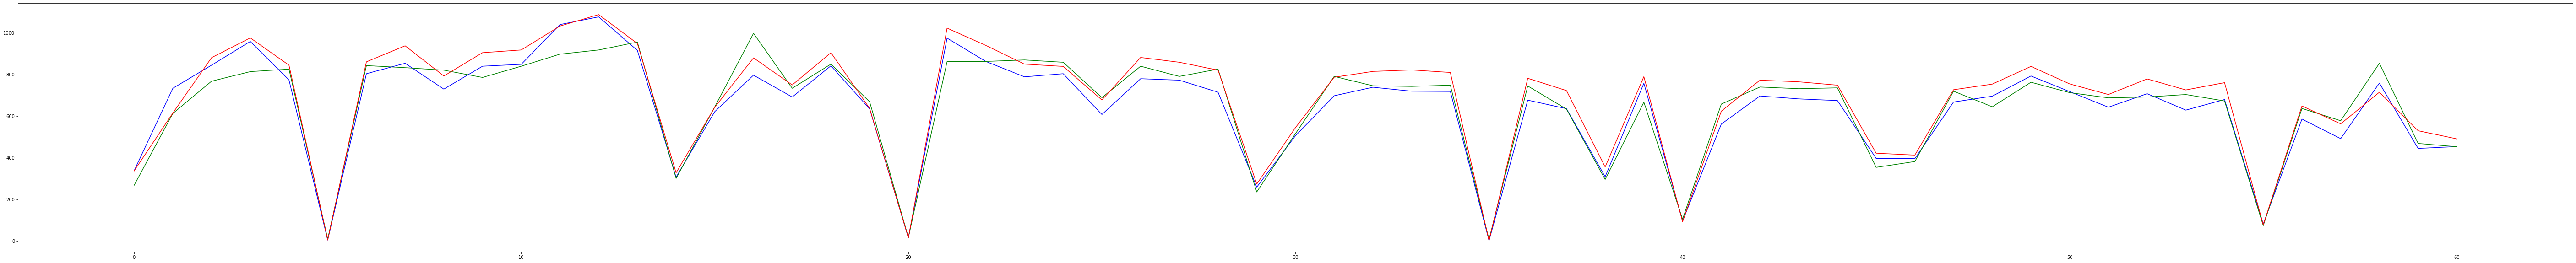

In [63]:
plotta_art(sales_mapping_art['041415'])

In [55]:
df[(df.cod_mart==125) & (df.mese<9) & ((df.mese<=2) | (df.mese>=6))]

Empty DataFrame
Columns: [cod_mart, mese, settimana, ggmese, qta_venduta, qta_predetta, agent_sales]
Index: []

# Data Analysis 2

In [56]:
import warnings
from sklearn.metrics import *
codici=df_val.cod_mart.unique()
def evaluate(param,dataFrame,dizionario= sales_mapping_art.items(),tweedie=True):
    evaluation=pd.DataFrame(columns=['expV_score','vendite_medie','maxerr','mae','mse','msle','median_absolut','r2s','mpd','mgd','mtd'])
    if(tweedie):
        dataFrame=dataFrame[(dataFrame.agent_sales>0) &(dataFrame.qta_predetta>0)]
        

    inv_map = {v: k for k, v in dizionario}
    elementi= dataFrame[param].unique()
    for elemento in elementi:
        y_true=dataFrame[dataFrame[param]==elemento].agent_sales
        y_pred=dataFrame[dataFrame[param]==elemento].qta_predetta
        
        vendite_medie=y_true.mean()
        
        evs=explained_variance_score(y_true,y_pred)
    #Explained variance regression score function
        maxerr=max_error(y_true, y_pred)
    #max_error metric calculates the maximum residual error.
        mae=mean_absolute_error(y_true, y_pred)
    #Mean absolute error regression loss.
        mse=mean_squared_error(y_true, y_pred)
    #Mean squared error regression loss.
        msle=mean_squared_log_error(y_true, y_pred)
    #Mean squared logarithmic error regression loss.
        medae=median_absolute_error(y_true, y_pred)
    #Median absolute error regression loss.
       # mape=mean_absolute_percentage_error(y_true,y_pred)
    #Mean absolute percentage error regression loss.
        r2s=r2_score(y_true, y_pred,)
    #R^2 (coefficient of determination) regression score function.
        if tweedie:
            mpd=mean_poisson_deviance(y_true, y_pred)
        #Mean Poisson deviance regression loss.
            mgd=mean_gamma_deviance(y_true, y_pred)
        #Mean Gamma deviance regression loss.
            mtd=mean_tweedie_deviance(y_true, y_pred,power=1.7)
        #Mean Tweedie deviance regression loss.
        else:
            mpd=0
            mgd=0
            mtd=0
        evaluation.loc[inv_map[elemento]]=[evs,vendite_medie,maxerr,mae,mse,msle,medae,r2s,mpd,mgd,mtd]
        warnings.filterwarnings('ignore')
    return evaluation.reset_index().sort_values('vendite_medie',ascending=False)

In [57]:
a=evaluate('cod_mart',df_val[(df_val.cod_mdep==0)],sales_mapping_art.items(),tweedie=True)

In [77]:
a[:500]

index  expV_score  vendite_medie    maxerr          mae  \
358      802076    0.516099    1911.734694  3944.000   880.224490   
339      802125    0.431429    1873.255814  4570.000   917.965116   
351      806586   -0.017194    1505.000000  1738.000   698.583333   
411      873201    0.650000    1108.704918  1991.000   224.032787   
635     CND2729    0.802318     864.000000   967.000   591.666667   
401      841002    0.722526     862.288525  1141.000   180.642623   
208      138711    0.531644     835.082508  2857.000   304.610561   
349      806584    0.171627     820.615385   903.000   313.692308   
209      138716    0.588081     773.343234  2702.000   274.597360   
359      831001    0.794545     760.747541   795.000   120.603279   
320      802146    0.357709     697.368421  3654.000   324.385965   
412      847510    0.407236     674.307692   833.000   281.576923   
316      801630    0.486539     648.205128  1594.000   296.897436   
210      138719    0.583242     645.531353  1783.000   244.458746   
319      802144    0.377333     642.941176  1307.000   271.960784   
333      811851    0.265548     635.016807   646.000   131.949580   
332      801532    0.190112     634.615385   601.000   266.384615   
403      841003    0.789953     585.996721  1085.000   119.281967   
342      802134    0.573377     561.304348   880.000   207.724638   
354      802704    0.656505     558.367347   739.000   177.897959   
321      802148    0.551681     551.764706  1591.000   227.235294   
416      873202    0.698900     541.480263   866.000    94.108553   
177      055700  -50.611137     504.000000  2839.000  1690.333333   
24       010900    0.259744     501.726073  3635.000   204.267327   
334      801631    0.783765     488.275862   806.000   173.965517   
381      833206    0.588380     445.993443   941.000   138.718033   
338      802135    0.519594     435.936170   734.000   142.319149   
217      138788    0.562726     430.407285  1545.000   182.254967   
953      ORT035    0.886760     428.992032   177.000    51.605578   
1097     ROB693    1.000000     420.000000   197.000   197.000000   
1175     TLP001    0.390653     413.570492   888.000    95.963934   
438      ALB036   -1.267579     400.000000   655.000   313.800000   
347      803366    0.244550     352.800000   616.000   162.080000   
219      156000    0.417850     346.187500  4832.000   133.299342   
109      035704    0.630516     319.673267  1527.000    86.706271   
361      831002    0.650876     318.927393   492.000    59.815182   
204      138611    0.592216     311.925170  1744.000   108.551020   
931      ORT004    0.859291     295.525896   314.000    49.541833   
622   CND001463    0.424560     284.909091  1294.000    99.255245   
1176     TLP002    0.510014     282.186885   310.000    63.560656   
368      831011    0.782451     277.471947   365.000    61.940594   
364      831003    0.719541     277.006579   460.000    55.378289   
205      138616    0.588754     275.301695  1298.000    99.549153   
340      803345    0.227623     272.916667   348.000   120.666667   
474      882310    0.559563     266.666667   563.000   103.291667   
369      831009    0.688518     258.442953   556.000    79.446309   
133      034151    0.814622     252.000000   103.000    87.500000   
363      831005    0.727183     248.750820   493.000    61.429508   
511     BND6212    0.569970     245.120370   350.000    82.138889   
370      831014    0.509351     243.758503   492.000    54.816327   
72       031640    0.551407     241.651163   799.000    64.594684   
343      802133    0.399936     238.536585   346.000   101.390244   
117      035724    0.588606     236.576159  1341.000    74.658940   
102      033839    0.705602     234.337748   506.000    62.099338   
400      841001    0.573336     234.315789   509.000    59.631579   
326      803355    0.393140     233.928571   327.000    99.571429   
207      138708    0.619031     231.043478   750.000    82.000000   
382     